In [1]:
import sys
print(sys.version)

3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


# Simulating a Predator and Prey Relationship

Without a predator, rabbits will reproduce until they reach the carrying capacity of the land. When coyotes show up, they will eat the rabbits and reproduce until they can't find enough rabbits. We will explore the fluctuations in the two populations over time.

## Part 1: Rabbits without predators

According to [Mother Earth News](https://www.motherearthnews.com/homesteading-and-livestock/rabbits-on-pasture-intensive-grazing-with-bunnies-zbcz1504), a rabbit eats six square feet of pasture per day. Let's assume that our rabbits live in a five acre clearing in a forest: 217,800 square feet/6 square feet = 36,300 rabbit-days worth of food. For simplicity, let's assume the grass grows back in two months. Thus, the carrying capacity of five acres is 36,300/60 = 605 rabbits.

Female rabbits reproduce about six to seven times per year. They have six to ten children in a litter.  According to [Wikipedia](https://en.wikipedia.org/wiki/Rabbit), a wild rabbit reaches sexual maturity when it is about six months old and typically lives one to two years. For simplicity, let's assume that in the presence of unlimited food, a rabbit lives forever, is immediately sexually mature, and has 1.5 children every month.

For our purposes, then, let $x_t$ be the number of rabbits in our five acre clearing on month $t$.
$$
\begin{equation*}
  R_t = R_{t-1} + 1.5\frac{605 - R_{t-1}}{605} R_{t-1}
\end{equation*}
$$

The formula could be put into general form
$$
\begin{equation*}
  R_t = R_{t-1} + \text{growth rate} \times \big( \frac{capacity - R_{t-1}}{capacity} \big) R_{t-1}
\end{equation*}
$$

By doing this, we allow users to interact with growth rate and the capacity value visualize different interaction 


In [2]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display, clear_output
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%matplotlib inline
capacity = widgets.FloatText(description="Capacity", value=605)
growth_rate = widgets.FloatText(description="Growth rate", value=1.5)
button = widgets.Button(description="Plot Graph")
display(capacity, growth_rate, button)
def plot_graph(b):
    clear_output()
    display(capacity, growth_rate, button)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    t = np.arange(0, 20, 1)
    s = np.zeros(t.shape)
    R = 1
    for i in range(t.shape[0]):
        s[i] = R
        R = R + growth_rate.value * (capacity.value - R)/(capacity.value) * R
        
    ax.plot(t, s)
    ax.set(xlabel='time (months)', ylabel='rabbits',
       title='Rabbits Without Predators')
    ax.grid()
    fig.canvas.draw_idle()

button.on_click(plot_graph)

FloatText(value=605.0, description='Capacity')

FloatText(value=1.5, description='Growth rate')

Button(description='Plot Graph', style=ButtonStyle())

## Part 2: Coyotes without preys
According to [Huntwise](https://www.besthuntingtimes.com/blog/2020/2/3/why-you-should-coyote-hunt-how-to-get-started), coyotes need to consume about 2-3 pounds of food per day. Their diet is 90 percent mammalian. The perfect adult cottontail rabbits weigh 2.6 pounds on average. Thus, we assume the coyote eats one rabbit per day. 

For coyotes, the breeding season is in February and March. According to [Wikipedia](https://en.wikipedia.org/wiki/Coyote#Social_and_reproductive_behaviors), females have a gestation period of 63 days, with an average litter size of 6, though the number fluctuates depending on coyote population density and the abundance of food. By fall, the pups are old enough to hunt for themselves.

In the absence of rabbits, the number of coyotes will drop, as their food supply is scarce.
The formula could be put into general form:

$$
\begin{eqnarray}
  C_t & \sim & (1 - \text{percent decrease per month}) \times C_{t-1},
\end{eqnarray}
$$



FloatText(value=200.0, description='Initial Capacity', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.5, description='Declining rate')

Button(description='Plot Graph', style=ButtonStyle())

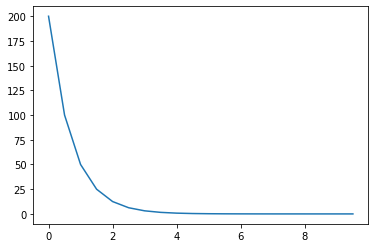

In [18]:
%matplotlib inline
layout = widgets.Layout(width='auto')
from ipywidgets import IntSlider
style = {'description_width': 'initial'}

capacity=widgets.FloatText(description="Initial Capacity",style=style,value=200.0,)
declining_rate=widgets.FloatText(description="Declining rate",value=0.5)
button=widgets.Button(description="Plot Graph")
display(capacity,declining_rate,button)


def plot_graph(b):
    clear_output()
    display(capacity, declining_rate, button)
    fig=plt.figure()
    ax=fig.add_subplot(111)
    x=np.arange(0,10,0.5)
    y=np.zeros(x.shape)
    C=capacity.value
    for i in range(len(x)):
        y[i]=C
        C=(1 - declining_rate.value)*C
    ax.plot(x,y)
    
button.on_click(plot_graph)
